<a href="https://colab.research.google.com/github/AlejoMoncada/AlejoMoncada/blob/main/Gini_RT_Sept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install quantecon
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import quantecon as qe
from numba import njit, float64, prange
from numba.experimental import jitclass

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
Total=pd.read_csv("/content/drive/MyDrive/Proyectos/Gene/Total Rappi - Earnings by RT.csv")
#define function to calculate Gini coefficient
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

print(gini(Total['TOTAL_EARNINGS']))

0.5075939464788215


In [50]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

0.5075939464788215


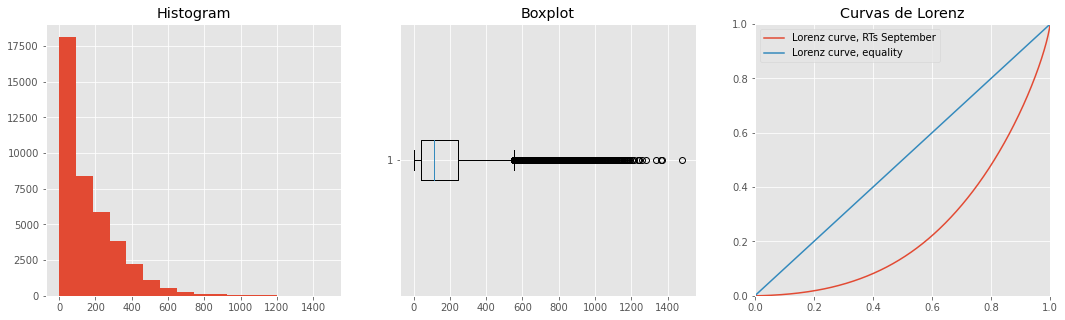

In [51]:
#f_vals, l_vals = qe.lorenz_curve(Total['TOTAL_EARNINGS'])

IngresosP= Total['TOTAL_EARNINGS']#/Total['TOTAL_EARNINGS'].count()
#IngresosP.transpose()

fig = plt.figure(figsize=(18,5))
plt.style.use('ggplot')
ax1= fig.add_subplot(1,3,1)
ax2= fig.add_subplot(1,3,2)
ax3= fig.add_subplot(1,3,3)

ax1.set_title('Histogram')
ax1.hist(Total['TOTAL_EARNINGS'], bins=16)
ax1.xaxis.grid(True, which='minor')

ax2.set_title('Boxplot')
ax2.boxplot(Total['TOTAL_EARNINGS'],vert=False)
ax2.xaxis.grid(True, which='minor')



ax3.set_title('Curvas de Lorenz')
f_vals, l_vals = qe.lorenz_curve(np.ravel(IngresosP))
#fig, ax = plt.subplots()
ax3.plot(f_vals, l_vals, label='Lorenz curve, RTs September')
ax3.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax3.set_ylim(0,1)
ax3.set_xlim(0,1)
ax3.legend()

print(gini(Total['TOTAL_EARNINGS']))

In [52]:
#Normalización de los datos. 
# IQR



Q1 = np.percentile(Total['TOTAL_EARNINGS'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(Total['TOTAL_EARNINGS'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

# Upper bound
upper = np.where(Total['TOTAL_EARNINGS'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(Total['TOTAL_EARNINGS'] <= (Q1-1.5*IQR))

Total_Able=Total.loc[:,['RT_ID','TOTAL_EARNINGS']]

scalar= preprocessing.RobustScaler().fit_transform(Total_Able)
IntQ_Data=pd.DataFrame(scalar,columns= ['RT_ID','TOTAL_EARNINGS'])


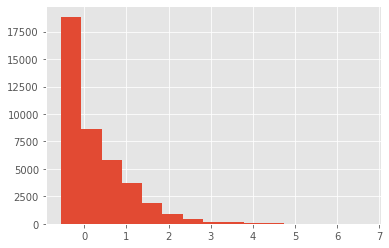

In [53]:
IntQ_Data['TOTAL_EARNINGS'].hist(bins=15)


1.6225846437942062


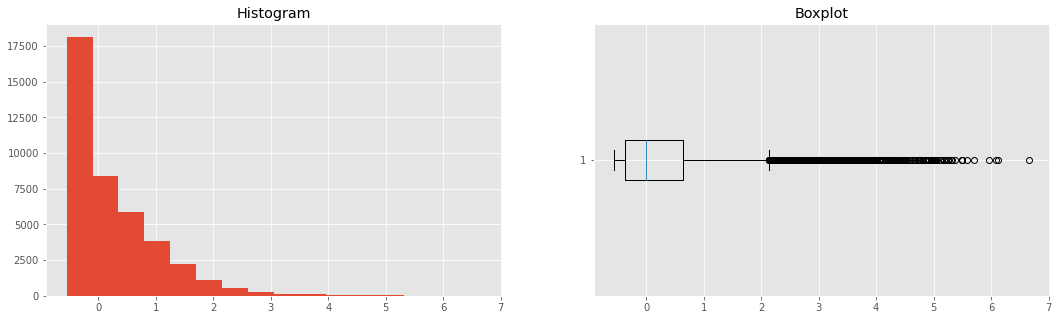

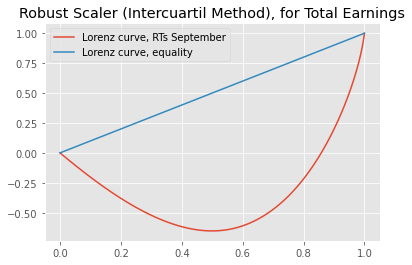

In [54]:
IngresosQ= IntQ_Data['TOTAL_EARNINGS']

fig = plt.figure(figsize=(27,5))
plt.style.use('ggplot')
ax1= fig.add_subplot(1,3,1)
ax2= fig.add_subplot(1,3,2)
ax2= fig.add_subplot(1,3,3)

ax1.set_title('Histogram')
ax1.hist(IntQ_Data['TOTAL_EARNINGS'], bins=16)

ax2.set_title('Boxplot')
ax2.boxplot(IntQ_Data['TOTAL_EARNINGS'],vert=False)

f_vals, l_vals = qe.lorenz_curve(np.ravel(IngresosQ))
fig, ax3 = plt.subplots()
ax3.plot(f_vals, l_vals, label='Lorenz curve, RTs September')
ax3.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax3.set_title('Robust Scaler (Intercuartil Method), for Total Earnings')
ax3.legend()

print(gini(IntQ_Data['TOTAL_EARNINGS']))

0.5106721776272685


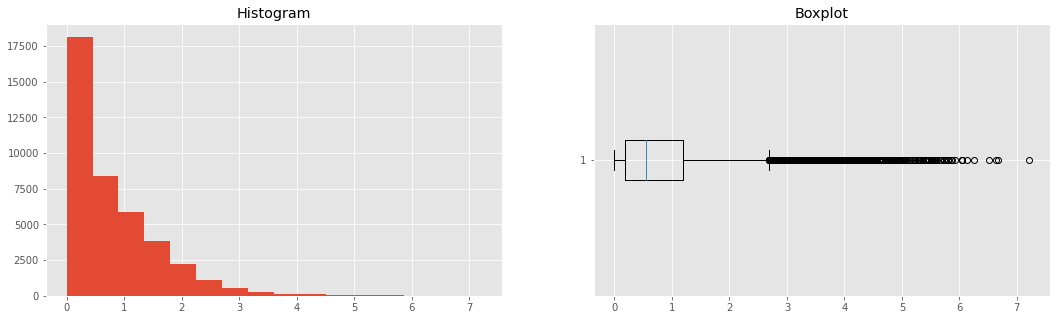

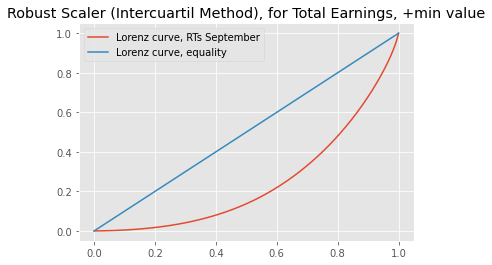

In [55]:
IntQ_Data['TOTAL_EARNINGS']=IntQ_Data['TOTAL_EARNINGS']+abs(IntQ_Data['TOTAL_EARNINGS'].min())
fig = plt.figure(figsize=(18,5))
plt.style.use('ggplot')
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)


ax1.set_title('Histogram')
ax1.hist(IntQ_Data['TOTAL_EARNINGS'], bins=16)

ax2.set_title('Boxplot')
ax2.boxplot(IntQ_Data['TOTAL_EARNINGS'],vert=False)


f_vals, l_vals = qe.lorenz_curve(np.ravel(IngresosQ))
fig, ax3 = plt.subplots()
ax3.plot(f_vals, l_vals, label='Lorenz curve, RTs September')
ax3.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax3.set_title('Robust Scaler (Intercuartil Method), for Total Earnings, +min value')
ax3.legend()


print(gini(IntQ_Data['TOTAL_EARNINGS']))

0.23809458047531767


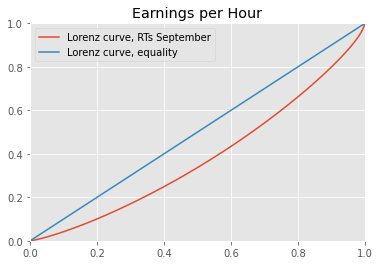

In [56]:
IngresosQ= Total['Earnings per Hour']

f_vals, l_vals = qe.lorenz_curve(np.ravel(IngresosQ))
fig, ax = plt.subplots()
ax.plot(f_vals, l_vals, label='Lorenz curve, RTs September')
ax.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.set_title('Earnings per Hour')
ax.legend()
plt.style.use('ggplot')
print(gini(Total['Earnings per Hour']))

0.5050503373475648


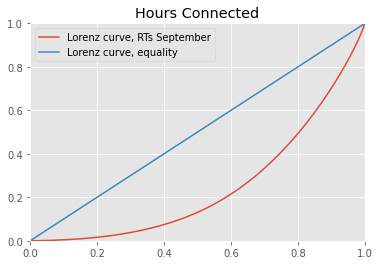

In [57]:
IngresosQ= Total['HOURS_CONNECTED']


f_vals, l_vals = qe.lorenz_curve(np.ravel(IngresosQ))
fig, ax = plt.subplots()
ax.plot(f_vals, l_vals, label='Lorenz curve, RTs September')
ax.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.set_title('Hours Connected')
ax.legend()
plt.style.use('ggplot')
print(gini(Total['HOURS_CONNECTED']))

CPG's data, in this case will be analyze de information about on granular mode for all the data on the main retailers, like Exito and Carulla.

0.49389892534580665
0.24385992654039487


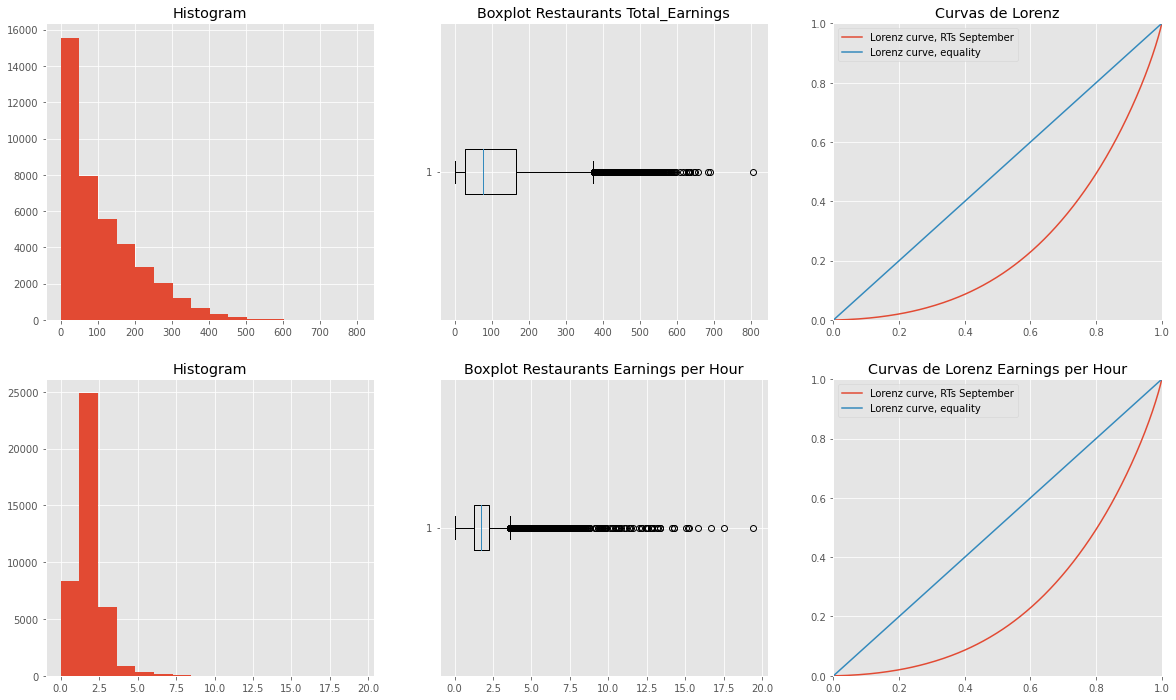

In [58]:
Total=pd.read_csv("/content/drive/MyDrive/Proyectos/Gene/Restaurants - Earnings by RT.csv")
Df_Restaurants = Total[Total['TOTAL_EARNINGS'].notnull()]
#f_vals, l_vals = qe.lorenz_curve(Total['TOTAL_EARNINGS'])
Df_Restaurants



#Total['TOTAL_EARNINGS'] = Total[Total['TOTAL_EARNINGS'].isnull()]
IngresosP= Df_Restaurants['TOTAL_EARNINGS']#/Total['TOTAL_EARNINGS'].count()
#IngresosP.transpose()


#Df_Restaurants['TOTAL_EARNINGS'] = Df_Restaurants[Df_Restaurants['TOTAL_EARNINGS'].isnull()]
IngresosP= Df_Restaurants['TOTAL_EARNINGS']#/Df_Restaurants['TOTAL_EARNINGS'].count()
#IngresosP.transpose()

fig = plt.figure(figsize=(20,12))
plt.style.use('ggplot')
ax1= fig.add_subplot(2,3,1)
ax2= fig.add_subplot(2,3,2)
ax3= fig.add_subplot(2,3,3)
ax4= fig.add_subplot(2,3,4)
ax5= fig.add_subplot(2,3,5)
ax6= fig.add_subplot(2,3,6)

ax1.set_title('Histogram')
ax1.hist(Df_Restaurants['TOTAL_EARNINGS'], bins=16)
ax1.xaxis.grid(True, which='minor')

ax2.set_title('Boxplot Restaurants Total_Earnings')
ax2.boxplot(Df_Restaurants['TOTAL_EARNINGS'],vert=False)
ax2.xaxis.grid(True, which='minor')


ax3.set_title('Curvas de Lorenz')
f_vals, l_vals = qe.lorenz_curve(np.ravel(IngresosP))
#fig, ax = plt.subplots()
ax3.plot(f_vals, l_vals, label='Lorenz curve, RTs September')
ax3.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax3.set_ylim(0,1)
ax3.set_xlim(0,1)
ax3.legend()
print(gini(Df_Restaurants['TOTAL_EARNINGS']))


ax4.set_title('Histogram')
ax4.hist(Df_Restaurants['Earnings per Hour'], bins=16)
ax4.xaxis.grid(True, which='minor')

ax5.set_title('Boxplot Restaurants Earnings per Hour')
ax5.boxplot(Df_Restaurants['Earnings per Hour'],vert=False)
ax5.xaxis.grid(True, which='minor')


ax6.set_title('Curvas de Lorenz Earnings per Hour')
f_vals, l_vals = qe.lorenz_curve(np.ravel(IngresosP))
#fig, ax = plt.subplots()
ax6.plot(f_vals, l_vals, label='Lorenz curve, RTs September')
ax6.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax6.set_ylim(0,1)
ax6.set_xlim(0,1)
ax6.legend()
print(gini(Df_Restaurants['Earnings per Hour']))


Df_Restaurants_PH = Total[Total['Earnings per Hour'].notnull()]


0.6050678174867483
0.2670896770948378


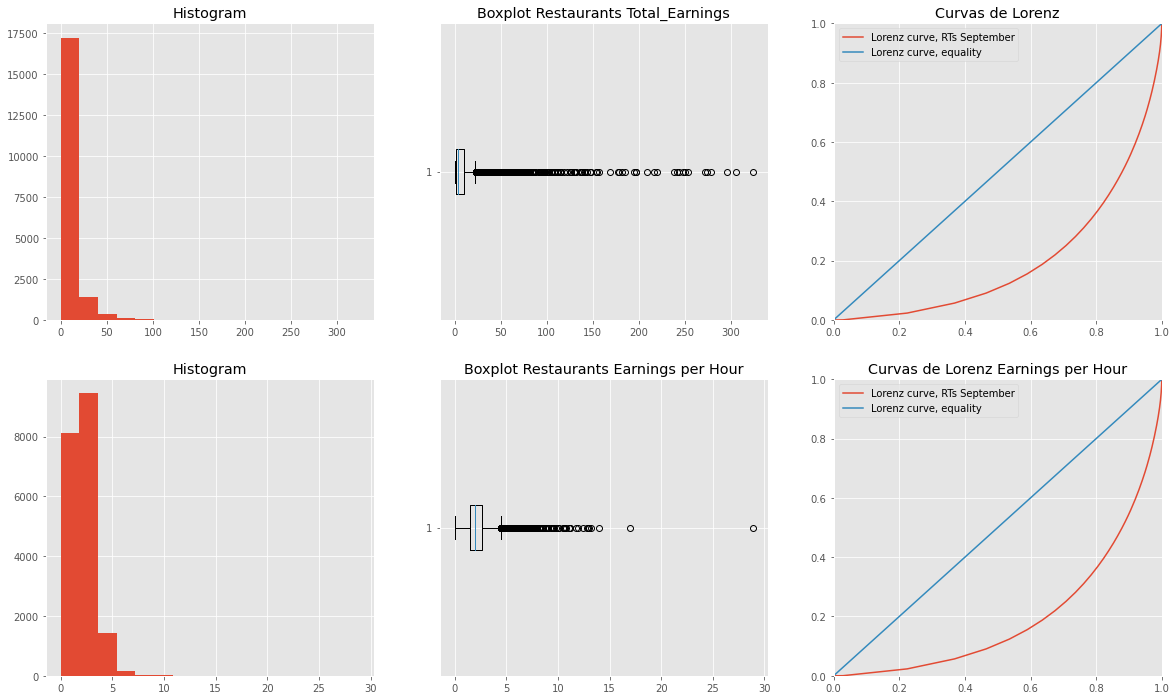

In [59]:
Total_C=pd.read_csv("/content/drive/MyDrive/Proyectos/Gene/Carulla - Earnings by RT.csv")
Df_CPG_Carulla = Total_C[Total_C['TOTAL_EARNINGS'].notnull()]
#f_vals, l_vals = qe.lorenz_curve(Total['TOTAL_EARNINGS'])
Df_CPG_Carulla



#Total['TOTAL_EARNINGS'] = Total[Total['TOTAL_EARNINGS'].isnull()]
IngresosP= Df_CPG_Carulla['TOTAL_EARNINGS']#/Total['TOTAL_EARNINGS'].count()
#IngresosP.transpose()


#Df_CPG_Carulla['TOTAL_EARNINGS'] = Df_CPG_Carulla[Df_CPG_Carulla['TOTAL_EARNINGS'].isnull()]
IngresosP= Df_CPG_Carulla['TOTAL_EARNINGS']#/Df_CPG_Carulla['TOTAL_EARNINGS'].count()
#IngresosP.transpose()

fig = plt.figure(figsize=(20,12))
plt.style.use('ggplot')
ax1= fig.add_subplot(2,3,1)
ax2= fig.add_subplot(2,3,2)
ax3= fig.add_subplot(2,3,3)
ax4= fig.add_subplot(2,3,4)
ax5= fig.add_subplot(2,3,5)
ax6= fig.add_subplot(2,3,6)

ax1.set_title('Histogram')
ax1.hist(Df_CPG_Carulla['TOTAL_EARNINGS'], bins=16)
ax1.xaxis.grid(True, which='minor')

ax2.set_title('Boxplot Restaurants Total_Earnings')
ax2.boxplot(Df_CPG_Carulla['TOTAL_EARNINGS'],vert=False)
ax2.xaxis.grid(True, which='minor')


ax3.set_title('Curvas de Lorenz')
f_vals, l_vals = qe.lorenz_curve(np.ravel(IngresosP))
#fig, ax = plt.subplots()
ax3.plot(f_vals, l_vals, label='Lorenz curve, RTs September')
ax3.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax3.set_ylim(0,1)
ax3.set_xlim(0,1)
ax3.legend()
print(gini(Df_CPG_Carulla['TOTAL_EARNINGS']))


ax4.set_title('Histogram')
ax4.hist(Df_CPG_Carulla['Earnings per Hour'], bins=16)
ax4.xaxis.grid(True, which='minor')

ax5.set_title('Boxplot Restaurants Earnings per Hour')
ax5.boxplot(Df_CPG_Carulla['Earnings per Hour'],vert=False)
ax5.xaxis.grid(True, which='minor')


ax6.set_title('Curvas de Lorenz Earnings per Hour')
f_vals, l_vals = qe.lorenz_curve(np.ravel(IngresosP))
#fig, ax = plt.subplots()
ax6.plot(f_vals, l_vals, label='Lorenz curve, RTs September')
ax6.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax6.set_ylim(0,1)
ax6.set_xlim(0,1)
ax6.legend()
print(gini(Df_CPG_Carulla['Earnings per Hour']))


Df_CPG_Carulla_PH = Total_C[Total_C['Earnings per Hour'].notnull()]


0.6209927273731823
0.2584756213454687


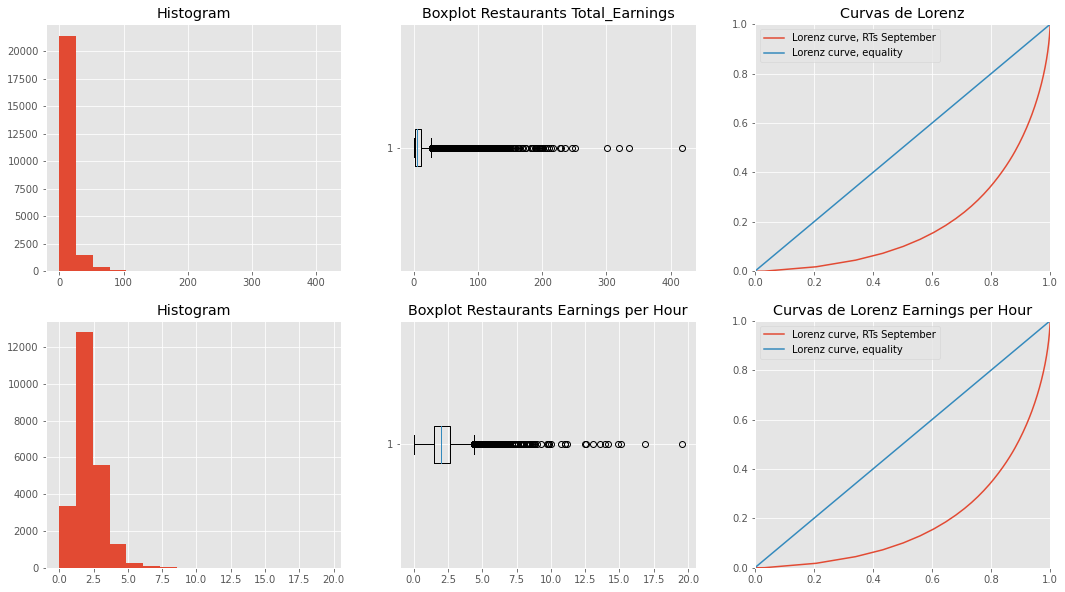

In [60]:
Total_C=pd.read_csv("/content/drive/MyDrive/Proyectos/Gene/Exito - Earnings by RT.csv")
Df_CPG_Exito = Total_C[Total_C['TOTAL_EARNINGS'].notnull()]
#f_vals, l_vals = qe.lorenz_curve(Total['TOTAL_EARNINGS'])
Df_CPG_Exito

#Total['TOTAL_EARNINGS'] = Total[Total['TOTAL_EARNINGS'].isnull()]
IngresosP= Df_CPG_Exito['TOTAL_EARNINGS']#/Total['TOTAL_EARNINGS'].count()
#IngresosP.transpose()

#Df_CPG_Exito['TOTAL_EARNINGS'] = Df_CPG_Exito[Df_CPG_Exito['TOTAL_EARNINGS'].isnull()]
IngresosP= Df_CPG_Exito['TOTAL_EARNINGS']#/Df_CPG_Exito['TOTAL_EARNINGS'].count()
#IngresosP.transpose()

fig = plt.figure(figsize=(18,10))
plt.style.use('ggplot')

ax1= fig.add_subplot(2,3,1)
ax2= fig.add_subplot(2,3,2)
ax3= fig.add_subplot(2,3,3)
ax4= fig.add_subplot(2,3,4)
ax5= fig.add_subplot(2,3,5)
ax6= fig.add_subplot(2,3,6)

ax1.set_title('Histogram')
ax1.hist(Df_CPG_Exito['TOTAL_EARNINGS'], bins=16)
ax1.xaxis.grid(True, which='minor')

ax2.set_title('Boxplot Restaurants Total_Earnings')
ax2.boxplot(Df_CPG_Exito['TOTAL_EARNINGS'],vert=False)
ax2.xaxis.grid(True, which='minor')


ax3.set_title('Curvas de Lorenz')
f_vals, l_vals = qe.lorenz_curve(np.ravel(IngresosP))
#fig, ax = plt.subplots()
ax3.plot(f_vals, l_vals, label='Lorenz curve, RTs September')
ax3.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax3.set_ylim(0,1)
ax3.set_xlim(0,1)
ax3.legend()
print(gini(Df_CPG_Exito['TOTAL_EARNINGS']))


ax4.set_title('Histogram')
ax4.hist(Df_CPG_Exito['Earnings per Hour'], bins=16)
ax4.xaxis.grid(True, which='minor')

ax5.set_title('Boxplot Restaurants Earnings per Hour')
ax5.boxplot(Df_CPG_Exito['Earnings per Hour'],vert=False)
ax5.xaxis.grid(True, which='minor')


ax6.set_title('Curvas de Lorenz Earnings per Hour')
f_vals, l_vals = qe.lorenz_curve(np.ravel(IngresosP))
#fig, ax = plt.subplots()
ax6.plot(f_vals, l_vals, label='Lorenz curve, RTs September')
ax6.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax6.set_ylim(0,1)
ax6.set_xlim(0,1)
ax6.legend()
print(gini(Df_CPG_Exito['Earnings per Hour']))


Df_CPG_Exito_PH = Total_C[Total_C['Earnings per Hour'].notnull()]


0.49331544977573166
0.2588759340305087


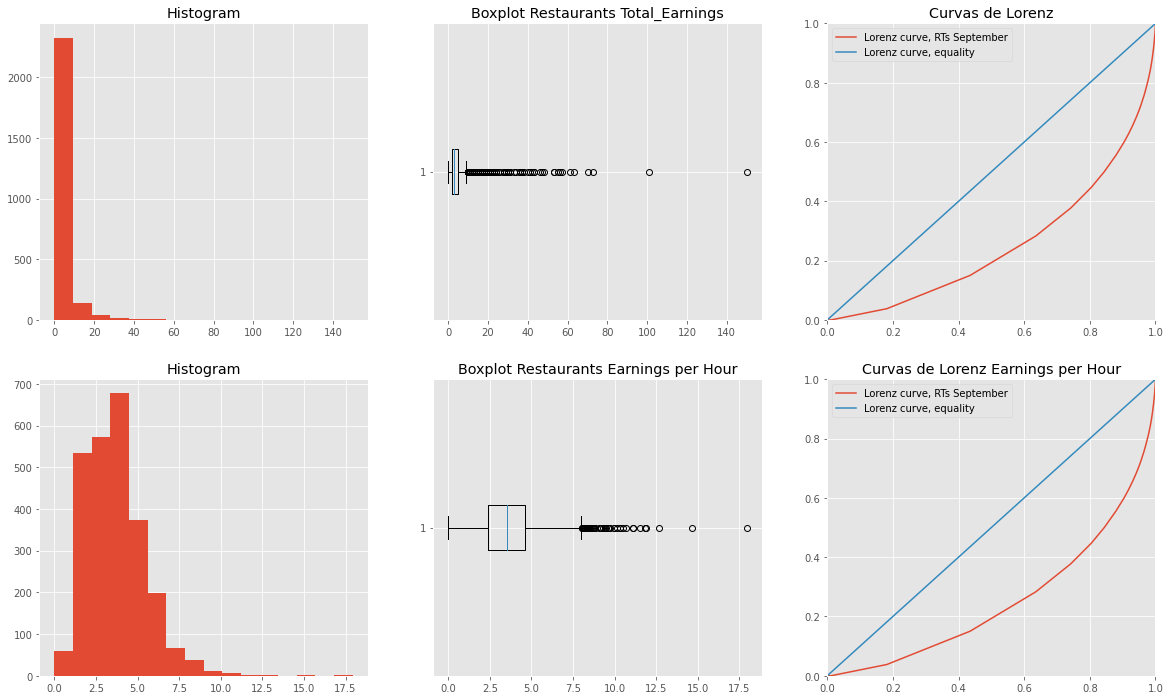

In [61]:
Total_C=pd.read_csv("/content/drive/MyDrive/Proyectos/Gene/PriceSmart - Earnings by RT.csv")
Df_CPG_Exito = Total_C[Total_C['TOTAL_EARNINGS'].notnull()]
#f_vals, l_vals = qe.lorenz_curve(Total['TOTAL_EARNINGS'])
Df_CPG_Exito



#Total['TOTAL_EARNINGS'] = Total[Total['TOTAL_EARNINGS'].isnull()]
IngresosP= Df_CPG_Exito['TOTAL_EARNINGS']#/Total['TOTAL_EARNINGS'].count()
#IngresosP.transpose()


#Df_CPG_Exito['TOTAL_EARNINGS'] = Df_CPG_Exito[Df_CPG_Exito['TOTAL_EARNINGS'].isnull()]
IngresosP= Df_CPG_Exito['TOTAL_EARNINGS']#/Df_CPG_Exito['TOTAL_EARNINGS'].count()
#IngresosP.transpose()

fig = plt.figure(figsize=(20,12))
plt.style.use('ggplot')
ax1= fig.add_subplot(2,3,1)
ax2= fig.add_subplot(2,3,2)
ax3= fig.add_subplot(2,3,3)
ax4= fig.add_subplot(2,3,4)
ax5= fig.add_subplot(2,3,5)
ax6= fig.add_subplot(2,3,6)

ax1.set_title('Histogram')
ax1.hist(Df_CPG_Exito['TOTAL_EARNINGS'], bins=16)
ax1.xaxis.grid(True, which='minor')

ax2.set_title('Boxplot Restaurants Total_Earnings')
ax2.boxplot(Df_CPG_Exito['TOTAL_EARNINGS'],vert=False)
ax2.xaxis.grid(True, which='minor')


ax3.set_title('Curvas de Lorenz')
f_vals, l_vals = qe.lorenz_curve(np.ravel(IngresosP))
#fig, ax = plt.subplots()
ax3.plot(f_vals, l_vals, label='Lorenz curve, RTs September')
ax3.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax3.set_ylim(0,1)
ax3.set_xlim(0,1)
ax3.legend()
print(gini(Df_CPG_Exito['TOTAL_EARNINGS']))

ax4.set_title('Histogram')
ax4.hist(Df_CPG_Exito['Earnings per Hour'], bins=16)
ax4.xaxis.grid(True, which='minor')

ax5.set_title('Boxplot Restaurants Earnings per Hour')
ax5.boxplot(Df_CPG_Exito['Earnings per Hour'],vert=False)
ax5.xaxis.grid(True, which='minor')


ax6.set_title('Curvas de Lorenz Earnings per Hour')
f_vals, l_vals = qe.lorenz_curve(np.ravel(IngresosP))
#fig, ax = plt.subplots()
ax6.plot(f_vals, l_vals, label='Lorenz curve, RTs September')
ax6.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax6.set_ylim(0,1)
ax6.set_xlim(0,1)
ax6.legend()
print(gini(Df_CPG_Exito['Earnings per Hour']))

Df_CPG_Exito_PH = Total_C[Total_C['Earnings per Hour'].notnull()]

In [62]:
#Category RT

Total_C=pd.read_csv("/content/drive/MyDrive/Proyectos/Gene/Rt Category Earnings.csv")
Total_C.columns
Total_C.groupby(by=['LEVEL']).count()
#bronze, danger	,diamond	,rookie	,silver
bronze=Total_C[Total_C['LEVEL'].str.contains('bronze')]
danger=Total_C[Total_C['LEVEL'].str.contains('danger')]
diamond=Total_C[Total_C['LEVEL'].str.contains('diamond')]
rookie=Total_C[Total_C['LEVEL'].str.contains('rookie')]
silver=Total_C[Total_C['LEVEL'].str.contains('silver')]



The Gini Coeficient for bronze is: 
0.8292513604187235
0.6884589236610559
0.6876858100569733


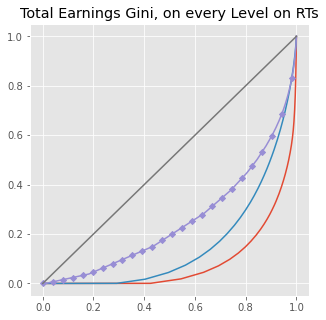

In [63]:
Total_C=pd.read_csv("/content/drive/MyDrive/Proyectos/Gene/Vechicle Earnings.csv")
Bronze = Total_C[Total_C['TOTAL_EARNINGS'].notnull()]
#f_vals, l_vals = qe.lorenz_curve(Total['TOTAL_EARNINGS'])

fig = plt.figure(figsize=(5,5))
ax1= fig.add_subplot(1,1,1)
plt.style.use('ggplot')
#Generate Array
IngresosB= bronze['TOTAL_EARNINGS']
IngresosD= diamond['TOTAL_EARNINGS']
IngresosS= silver['TOTAL_EARNINGS']
#Calculate Lorenz
f_vals_bronze, l_vals_bronze = qe.lorenz_curve(np.ravel(IngresosB))
f_vals_diamond, l_vals_diamond = qe.lorenz_curve(np.ravel(IngresosP))
f_vals_silver, l_vals_silver = qe.lorenz_curve(np.ravel(IngresosS))
#Graphics for Lorenz
ax1.plot(f_vals_bronze, l_vals_bronze, label='Lorenz curve, RTs Bronze')
ax1.plot(f_vals_silver, l_vals_silver, label='Lorenz curve, RTs Silver')
ax1.plot(f_vals_diamond, l_vals_diamond, label='Lorenz curve, RTs Diamond',marker='$◆$',markevery=100)
ax1.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax1.set_title('Total Earnings Gini, on every Level on RTs')


print('The Gini Coeficient for bronze is: ')
print(gini(bronze['TOTAL_EARNINGS']))
print(gini(silver['TOTAL_EARNINGS']))
print(gini(diamond['TOTAL_EARNINGS']))


0.5885337967027708
0.48063423557719737
0.44241352384876503


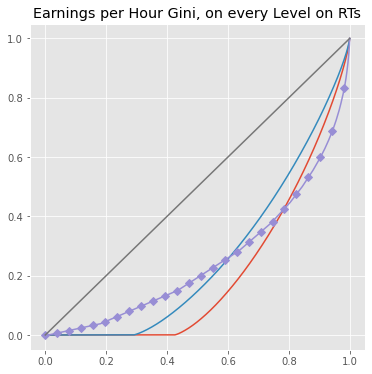

In [64]:
fig = plt.figure(figsize=(6,6))
ax1= fig.add_subplot(1,1,1)
plt.style.use('ggplot')
#Generate Array
IngresosB= bronze['Earnings per Hour']
IngresosD= diamond['Earnings per Hour']
IngresosS= silver['Earnings per Hour']
#Calculate Lorenz
f_vals_bronze, l_vals_bronze = qe.lorenz_curve(np.ravel(IngresosB))
f_vals_diamond, l_vals_diamond = qe.lorenz_curve(np.ravel(IngresosP))
f_vals_silver, l_vals_silver = qe.lorenz_curve(np.ravel(IngresosS))
#Graphics for Lorenz
ax1.plot(f_vals_bronze, l_vals_bronze, label='Lorenz curve, RTs Bronze')
ax1.plot(f_vals_silver, l_vals_silver, label='Lorenz curve, RTs Silver')
ax1.plot(f_vals_diamond, l_vals_diamond, label='Lorenz curve, RTs Diamond',marker='D',markevery=100)
ax1.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax1.set_title('Earnings per Hour Gini, on every Level on RTs')

print(gini(bronze['Earnings per Hour']))
print(gini(silver['Earnings per Hour']))
print(gini(diamond['Earnings per Hour']))

In [ ]:
Total_V=pd.read_csv("/content/drive/MyDrive/Proyectos/Gene/Vechicle Earnings.csv")


Total_Bicicle=Total_V[Total_V['VEHICLE'].str.contains('bicycle')]
Total_Motor=Total_V[Total_V['VEHICLE'].str.contains('motorcycle')]

fig = plt.figure(figsize=(6,6))
plt.style.use('ggplot')
ax1= fig.add_subplot(1,1,1)

#Generate Array
IngresosB= Total_Bicicle['Earnings per Hour']
IngresosM= Total_Motor['Earnings per Hour']
#Calculate Lorenz
f_vals_bronze, l_vals_bronze = qe.lorenz_curve(np.ravel(IngresosB))
f_vals_diamond, l_vals_diamond = qe.lorenz_curve(np.ravel(IngresosM))
#Graphics for Lorenz
ax1.plot(f_vals_bronze, l_vals_bronze, label='Lorenz curve, RTs Bronze')
ax1.plot(f_vals_diamond, l_vals_diamond, label='Lorenz curve, RTs Diamond',marker='D',markevery=1000)
ax1.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax1.set_title('Earnings per Hour Gini, for type of vehicule')

print(gini(Total_Bicicle['Earnings per Hour']))
print(gini(Total_Motor['Earnings per Hour']))





0.6159100863293883
